In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def imshow(img: cv2.Mat):
    plt.axis('off')
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    plt.show()

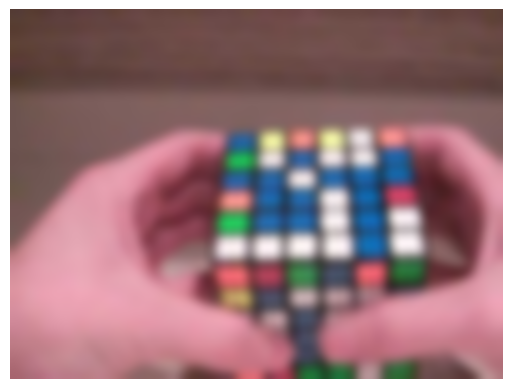

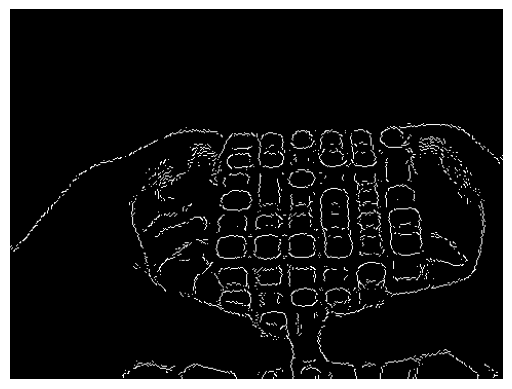

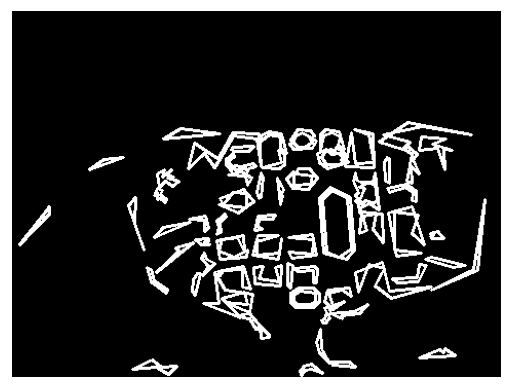

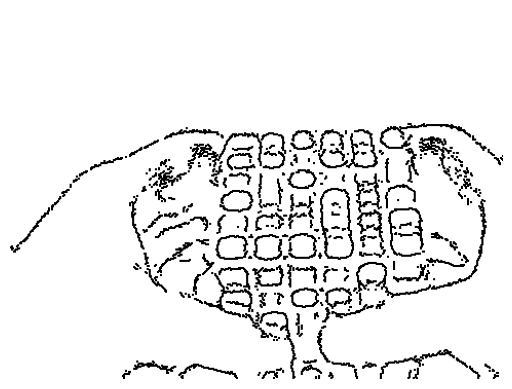

4

In [81]:
def get_cube_contours(img: cv2.Mat, show: bool = False) -> list[np.ndarray]:

    # computes some sizes
    reference_size = max(img.shape)
    blur_size = reference_size // 40
    kernel_size = reference_size // 200

    # image processing to get contours
    blur = cv2.GaussianBlur(img, (blur_size,) * 2, kernel_size)
    edges = cv2.Canny(blur, 20, 30)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size,) * 2)
    dilated = cv2.bitwise_not(cv2.dilate(edges, kernel))
    contours = sorted(cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0], key=cv2.contourArea, reverse=True)
    approx = [*map(lambda x: cv2.approxPolyDP(x, 0.03*cv2.arcLength(x, True), True), contours)]
    
    # filter the contours, show if needed
    filtered = filter_cubie_contuors(contours, approx)
    if show:
        cv2.drawContours(np.zeros_like(img), approx, -1, (255, 255, 255), 2)
    return filtered
    

def filter_cubie_contuors(contours: list[np.ndarray], approx: list[np.ndarray]) -> list[np.ndarray]:
    return approx

img = cv2.imread("./images/6x6_other.png")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(img, (21, 21), 5)
imshow(blur)

# thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 1)
thresh = cv2.Canny(blur, 20, 30)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (int(max(img.shape) / 200),) * 2)
adjusted = cv2.bitwise_not(cv2.dilate(thresh, kernel))
# adjusted = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
contours = sorted(cv2.findContours(adjusted, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0], key=cv2.contourArea, reverse=True)
approx = [*map(lambda x: cv2.approxPolyDP(x, 0.03*cv2.arcLength(x, True), True), contours)]
imshow(thresh)
imshow(cv2.drawContours(np.zeros_like(img), approx[:70], -1, (255, 255, 255), 2))
imshow(adjusted)
int(max(img.shape) / 100)

In [82]:
400/11

36.36363636363637